# **Lesson - 3**

## **Reading the Graph**

In [9]:
lesmis = nx.read_edgelist('./data/lesmis.txt', nodetype = int, data = (('weight',float),))

In [10]:
lesmis = lesmis.to_undirected()
lesmis.remove_edges_from(nx.selfloop_edges(lesmis))

In [11]:
lesmis_cc = sorted(nx.connected_components(lesmis), key = len, reverse =True)
lesmis = lesmis.subgraph(lesmis_cc[0])
lesmis = nx.convert_node_labels_to_integers(lesmis, first_label = 0 )

In [12]:
N = len(lesmis)
M = lesmis.number_of_edges()

print(f'Number of nodes: {N}')
print(f'Number of edges: {M}')

Number of nodes: 77
Number of edges: 254


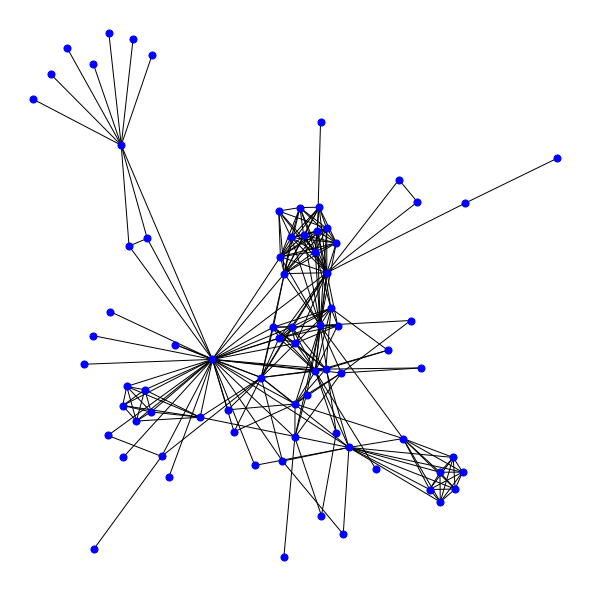

In [13]:
positions = nx.spring_layout(lesmis)
nx.draw(lesmis, positions, node_color = 'b', node_size = 50, with_labels = False)

## **Measurements**

- ## The avarage shortest path


In [71]:
if nx.is_connected(lesmis) == True:
    
    length = nx.average_shortest_path_length(lesmis)
    
    print(f'Avarage shortest path length: {length:.4f}')

else:
    print(f'The graph has more than one connected component')

Avarage shortest path length: 2.6411


- ## Diameter

$$Diameter = \max \{shortest\_paths\}$$

In [72]:
lesmis_diameter = nx.diameter(lesmis)

print(f'Network diameter: {lesmis_diameter}')

Network diameter: 5


- ## Global Efficiency

$$E(G) = \frac{1}{n(n - 1)} \sum_{i \neq j z \in G} \frac{1}{d(i,j)}$$

$$E_{glob}(G) = \frac{E(G)}{E(G^{ideal})}$$

In [73]:
lesmis_global_efficiency = nx.global_efficiency(lesmis)

print(f'Network Global Efficiency: {lesmis_global_efficiency:.2f}')

Network Global Efficiency: 0.44


- ## Local Efficiency 

$$E_{loc}(G) = \frac{1}{n}\sum_{i \in G} E(G_i)$$

In [74]:
lesmis_local_efficiency = nx.local_efficiency(lesmis)

print(f'The average local efficiency of the network: {lesmis_local_efficiency:.2f}')

The average local efficiency of the network: 0.62


- ## Distribution of the shortest paths

In [75]:
distances = np.zeros((N, N))
    
values = []

if nx.is_connected(lesmis):
    
    for i in np.arange(N):
        for j in np.arange(i+1, N): # Loop through the array where i < j, because the distance matrix is symmetric
            
            if i != j :
                
                aux = nx.shortest_path(lesmis, i, j) # The sequence of nodes from i to j
                
                dij = len(aux) - 1
                
                distances[i][j] = dij
                distances[j][i] = dij
                
                values.append(dij)
else:
    print('The graph has more than one connected component')

In [76]:
bins = np.arange(lesmis_diameter + 1)

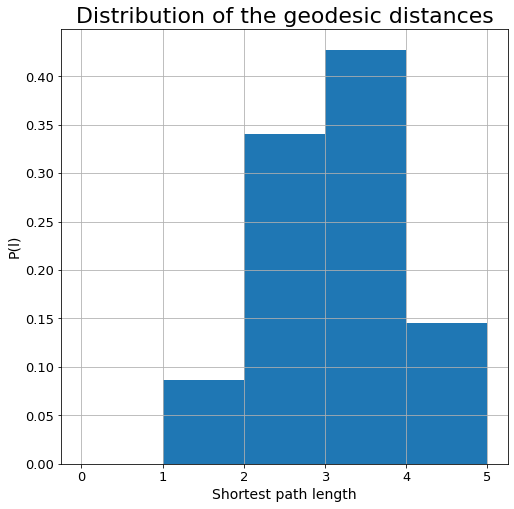

In [77]:
plt.hist(values, bins = bins, density = True)

plt.title('Distribution of the geodesic distances', fontsize = 22)

plt.xlabel('Shortest path length')
plt.ylabel('P(l)')

plt.grid(True)

- ## Degree Correlation

In [78]:
degree_assortativity = nx.degree_assortativity_coefficient(lesmis)

print(f'Assortativity: {degree_assortativity:.4f}')

Assortativity: -0.1652


In [79]:
ki = []
kj = []

In [80]:
for i in np.arange(N):
    for j in np.arange(N):
        
        if lesmis.has_edge(i, j) == True:
            
            ki.append(lesmis.degree(i))
            kj.append(lesmis.degree(j)) 

In [81]:
corr, _ = pearsonr(ki, kj)

print(f'Pearson correlation: {corr:.2f}')

Pearson correlation: -0.17


In [83]:
lesmis_knn = knn(lesmis)

print(f'Average degree of the neighborhood od the network: {lesmis_knn.mean():.2f}')

Average degree of the neighborhood od the network: 13.65


In [84]:
lesmis_ks, lesmis_knnk = knnk(lesmis)

In [85]:
par = np.polyfit(lesmis_ks, lesmis_knnk, 1, full = True)

slope = par[0][0]
intercept = par[0][1]

xl = [min(ks), max(ks)]
yl = [slope*xx + intercept for xx in xl]

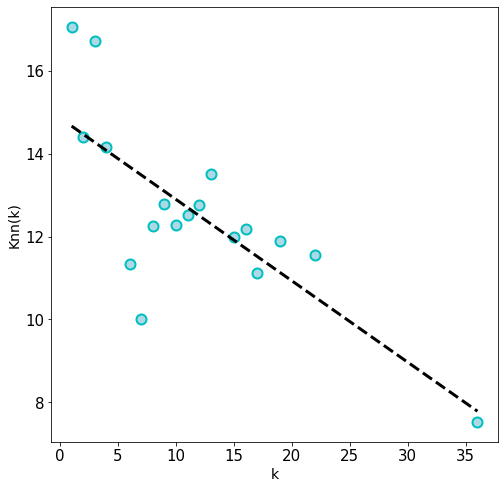

In [86]:
plt.plot(lesmis_ks, 
         lesmis_knnk, 
         '-o', 
         color = 'gray', 
         markersize = 10, 
         linewidth = 0, 
         markerfacecolor = 'lightblue', 
         markeredgecolor = 'c', 
         markeredgewidth = 2)

plt.xlabel('k')
plt.ylabel('Knn(k)')

plt.plot(xl, yl, '--', linewidth = 3, color = 'black')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show(True)

In [115]:
pearson_ksknnk = np.corrcoef(lesmis_ks, lesmis_knnk)[0, 1]

print(f'Pearson correlation coefficient: {pearson_ksknnk:.2f}')

Pearson correlation coefficient: -0.76


In [120]:
spearman_ksknnk = spearmanr(lesmis_ks, lesmis_knnk)

print(f'Spearman rank correlation cofficient: {spearman_ksknnk}')

Spearman rank correlation cofficient: SpearmanrResult(correlation=-0.6553147574819401, pvalue=0.0031558468964774365)


## **Exercises**

## Reading the Graphs

In [41]:
power_grid = clean_graph(nx.read_edgelist('./data/powergrid.txt', nodetype = int))
us_air = clean_graph(nx.read_edgelist('./data/usairport.txt', nodetype = int, data = (('weight', float),)))
euro_road = clean_graph(nx.read_edgelist('./data/euroroad.txt', nodetype = int))
net_science = clean_graph(nx.read_edgelist('./data/netscience.txt', nodetype = int))

## 1 - Calculate the distance and efficiency for the following networks: (i) Euro road, (ii) netscience, (iii) powergrid and (iv) USairport500.

In [49]:
diameter_euro_road = nx.diameter(euro_road)
diameter_net_science = nx.diameter(net_science)
diameter_power_grid = nx.diameter(power_grid)
diameter_us_air = nx.diameter(us_air)

print(f'Network Diameter: {diameter_euro_road}')
print(f'Network Diameter: {diameter_net_science}')
print(f'Network Diameter: {diameter_power_grid}')
print(f'Network Diameter: {diameter_us_air}')

Network Diameter: 62
Network Diameter: 17
Network Diameter: 46
Network Diameter: 7


In [51]:
global_efficiency_euro_road = nx.global_efficiency(euro_road)
global_efficiency_net_science = nx.global_efficiency(net_science)
global_efficiency_power_grid = nx.global_efficiency(power_grid)
global_efficiency_us_air = nx.global_efficiency(us_air)

print(f'Global Efficiency: {global_efficiency_euro_road}')
print(f'Global Efficiency: {global_efficiency_net_science}')
print(f'Global Efficiency: {global_efficiency_power_grid}')
print(f'Global Efficiency: {global_efficiency_us_air}')

Global Efficiency: 0.07721518254419718
Global Efficiency: 0.20323833661901694
Global Efficiency: 0.06287813459659497
Global Efficiency: 0.3713796736325798


## 2 - Calculate the Pearson and Spearman correlations between k and knn for the previous networks.

In [111]:
euro_road_pearson = np.corrcoef(knnk(euro_road))[0, 1]
net_science_pearson = np.corrcoef(knnk(net_science))[0, 1]
power_grid_pearson = np.corrcoef(knnk(power_grid))[0, 1]
us_air_pearson = np.corrcoef(knnk(us_air))[0, 1]

print(f'Euro Road Pearson correlation of k and knnk: {euro_road_pearson}')
print(f'Net Science Pearson correlation of k and knnk: {net_science_pearson}')
print(f'Power Grid Pearson correlation of k and knnk: {power_grid_pearson}')
print(f'US Air Pearson correlation of k and knnk: {us_air_pearson}')

Euro Road Pearson correlation of k and knnk: -0.05767677568700057
Net Science Pearson correlation of k and knnk: -0.5445720233007642
Power Grid Pearson correlation of k and knnk: -0.23907783109842345
US Air Pearson correlation of k and knnk: -0.7858660255874179


In [125]:
euro_road_spearman_ks, euro_road_spearman_knnk = knnk(euro_road)
net_science_spearman_ks, net_science_spearman_knnk = knnk(net_science)
power_grid_spearman_ks, power_grid_spearman_knnk = knnk(power_grid)
us_air_spearman_ks, us_air_spearman_knnk = knnk(us_air)

euro_road_spearman = spearmanr(euro_road_spearman_ks, euro_road_spearman_knnk)
net_science_spearman = spearmanr(net_science_spearman_ks, net_science_spearman_knnk)
power_grid_spearman = spearmanr(power_grid_spearman_ks, power_grid_spearman_knnk)
us_air_spearman = spearmanr(us_air_spearman_ks, us_air_spearman_knnk)

print(f'Euro Road Spearman correlation of k and knnk: {euro_road_spearman}')
print(f'Net Science Spearman correlation of k and knnk: {net_science_spearman}')
print(f'Power Grid Spearman correlation of k and knnk: {power_grid_spearman}')
print(f'US Air Spearman correlation of k and knnk: {us_air_spearman}')

Euro Road Spearman correlation of k and knnk: SpearmanrResult(correlation=0.2833333333333333, pvalue=0.46003032896571994)
Net Science Spearman correlation of k and knnk: SpearmanrResult(correlation=-0.5844155844155844, pvalue=0.005399998364912398)
Power Grid Spearman correlation of k and knnk: SpearmanrResult(correlation=-0.3294117647058824, pvalue=0.2128014262162131)
US Air Spearman correlation of k and knnk: SpearmanrResult(correlation=-0.7284340659340659, pvalue=8.97758608324617e-12)


## 3 - Calculate the assoartativity coefficiente for the previous networks. Construct a plot showing the assortativity coefficient and the average degree of the nearest neighbours.

In [130]:
euro_road_degree_assortativity = nx.degree_assortativity_coefficient(euro_road)

print(f'Assortativity: {euro_road_degree_assortativity:.4f}')

Assortativity: 0.0900


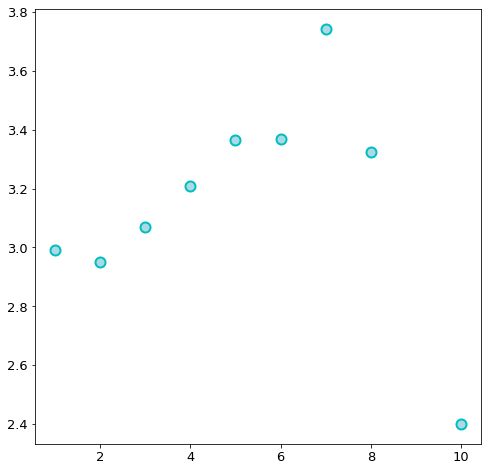

In [126]:
plt.plot(euro_road_spearman_ks, 
         euro_road_spearman_knnk, 
         '-o', 
         color = 'gray', 
         markersize = 10, 
         linewidth = 0, 
         markerfacecolor = 'lightblue', 
         markeredgecolor = 'c', 
         markeredgewidth = 2)

In [131]:
net_science_degree_assortativity = nx.degree_assortativity_coefficient(net_science)

print(f'Assortativity: {net_science_degree_assortativity:.4f}')

Assortativity: -0.0817


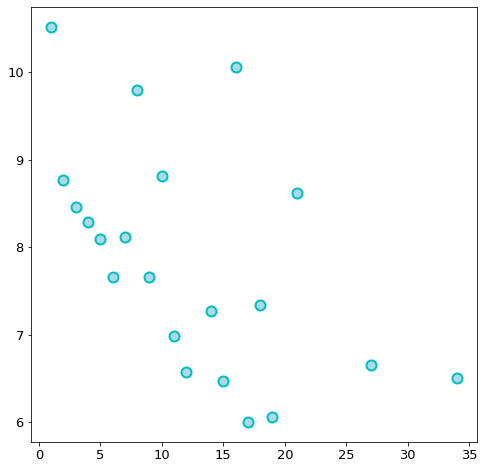

In [127]:
plt.plot(net_science_spearman_ks, 
         net_science_spearman_knnk, 
         '-o', 
         color = 'gray', 
         markersize = 10, 
         linewidth = 0, 
         markerfacecolor = 'lightblue', 
         markeredgecolor = 'c', 
         markeredgewidth = 2)

In [132]:
power_grid_degree_assortativity = nx.degree_assortativity_coefficient(power_grid)

print(f'Assortativity: {power_grid_degree_assortativity:.4f}')

Assortativity: 0.0035


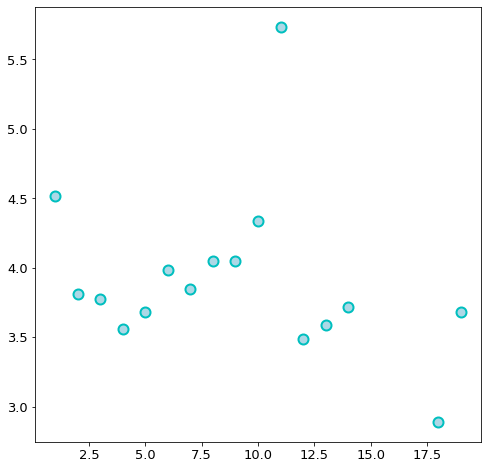

In [128]:
plt.plot(power_grid_spearman_ks, 
         power_grid_spearman_knnk, 
         '-o', 
         color = 'gray', 
         markersize = 10, 
         linewidth = 0, 
         markerfacecolor = 'lightblue', 
         markeredgecolor = 'c', 
         markeredgewidth = 2)

In [133]:
us_air_degree_assortativity = nx.degree_assortativity_coefficient(us_air)

print(f'Assortativity: {us_air_degree_assortativity:.4f}')

Assortativity: -0.2679


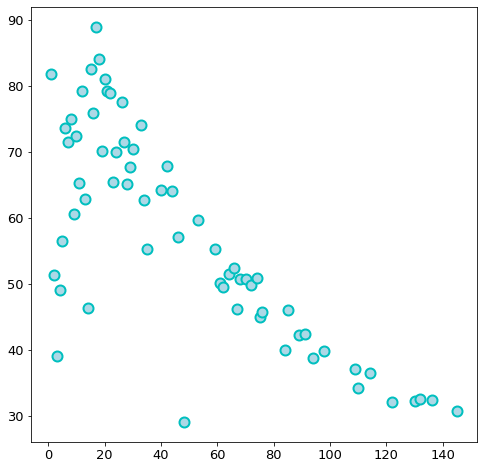

In [134]:
plt.plot(us_air_spearman_ks, 
         us_air_spearman_knnk, 
         '-o', 
         color = 'gray', 
         markersize = 10, 
         linewidth = 0, 
         markerfacecolor = 'lightblue', 
         markeredgecolor = 'c', 
         markeredgewidth = 2)

## 4 - For the celegans_metabolic network, calculate the Shannon entropy of the average shortest path length. Use base 2 in the logarithm function. Consider only the largest component of the network.

In [135]:
celegans_metabolic = clean_graph(nx.read_edgelist('./data/celegans_metabolic.txt', nodetype = int))

In [161]:
length = nx.all_pairs_shortest_path(celegans_metabolic)

In [162]:
length

<generator object all_pairs_shortest_path at 0x7f55eaf80e40>

## **Imports**

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import networkx as nx

In [6]:
from scipy.stats import pearsonr, spearmanr

## **Settings**

In [7]:
%matplotlib inline

In [8]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

## **Functions**

In [40]:
def clean_graph(G):
    
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    
    G_cc = sorted(nx.connected_components(G), key = len, reverse =True)
    G = G.subgraph(G_cc[0])
    G = nx.convert_node_labels_to_integers(G, first_label = 0 )
    
    return G

In [107]:
def knn(G):
    
    knn_G = np.zeros(len(G.nodes), dtype = float)
    
    for i in G.nodes:

        aux = nx.average_neighbor_degree(G, nodes = [i])
        knn_G[i] = float(aux[i])

    return knn_G

In [108]:
def knnk(G):
    
    knnk_G = []
    ks_G = []
    
    knn_G = knn(G)
    
    vk = np.array(list(dict(G.degree).values()))
    
    for k in np.arange(vk.min(), vk.max() + 1):
    
        aux = vk == k

        if len(knn_G[aux]) > 0 :

            average_knn = knn_G[aux].mean()

            knnk_G.append(average_knn)

            ks_G.append(k)
            
    return ks_G, knnk_G